### __About The Data__

The data we'll be using comes from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Abalone), and contains the following attributes about abalone:

- Sex
- Length
- Diameter
- Height
- Whole weight
- Shucked weight
- Viscera weight
- Shell weight

### __Context__
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

 ### __Importing Libraries__

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [6]:
abalone_df = pd.read_csv("abalone.csv")
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Data Exploration

In [7]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


There are 4177 rows and 9 columns. The columns include 1 categorical predictor (sex), 7 continuous predictors (Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight), and an integer response variable (number of rings)

In [8]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Start exploring the data by plotting some histograms of different quantities. Once we do that, we'll get a better idea of how they are distributed amongst the population of abalones sampled for this data set.

<AxesSubplot:xlabel='Rings', ylabel='Count'>

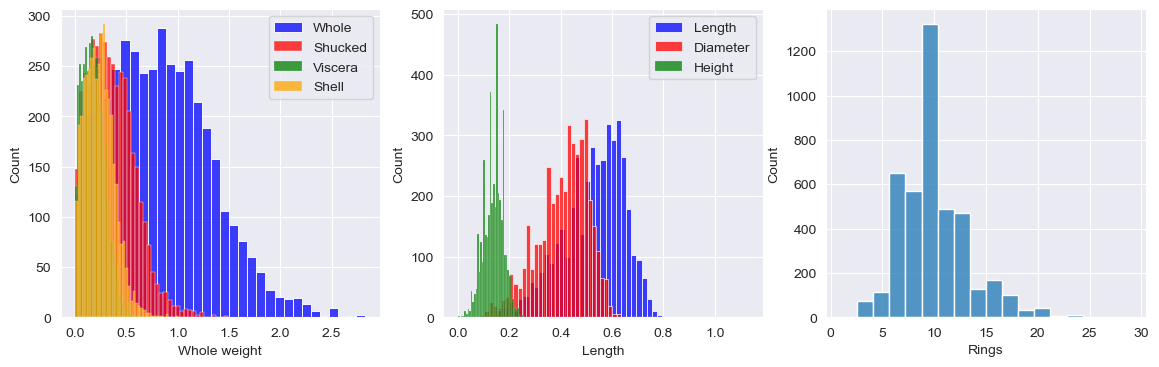

In [9]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.histplot(abalone_df['Whole weight'],   label='Whole',   ax=ax1, color='blue')
sns.histplot(abalone_df['Shucked weight'], label='Shucked', ax=ax1, color='red')
sns.histplot(abalone_df['Viscera weight'], label='Viscera', ax=ax1, color='green')
sns.histplot(abalone_df['Shell weight'],   label='Shell',   ax=ax1, color='orange')
ax1.legend()

sns.histplot(abalone_df['Length'],   label='Length', ax=ax2, color='blue')
sns.histplot(abalone_df['Diameter'], label='Diameter', ax=ax2, color='red')
sns.histplot(abalone_df['Height'],   label='Height', ax=ax2, color='green')
ax2.legend()

sns.histplot(abalone_df['Rings'], bins=18, ax=ax3)

In [10]:
abalone_df[abalone_df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


- Notice that there are 2 instance with 'Height' = 0 so we decided to drop those 2 rows

In [11]:
abalone_df = abalone_df[abalone_df['Height'] > 0]
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


<AxesSubplot:>

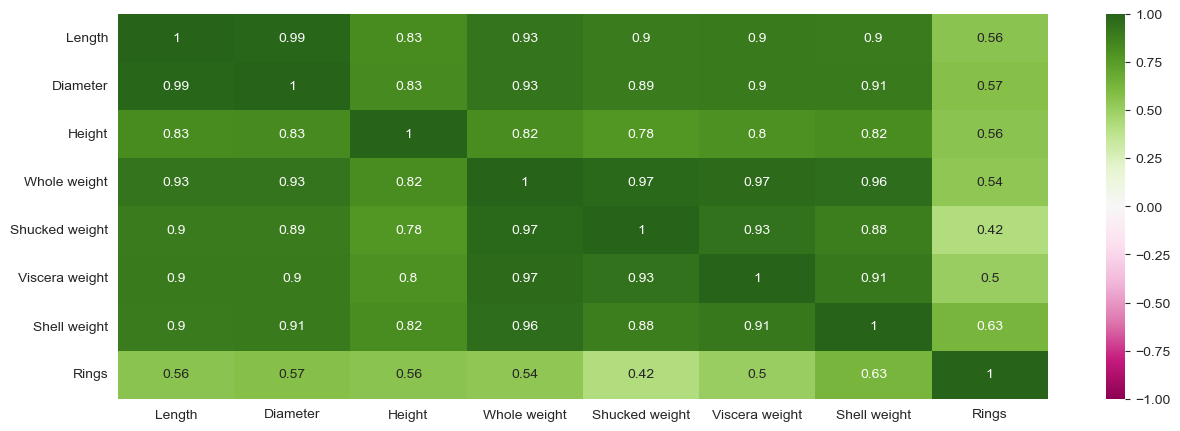

In [12]:
correlationMatrix = abalone_df.drop(['Sex'], axis = 1).corr()
sns.heatmap(correlationMatrix, cmap="PiYG", annot=True, vmin=-1, vmax=1)

- We noticed that there is multiple high independent attribute correlations (0.93, 0.83, etc). On the other hand, the correlation between the independent attributes and the dependent variable is average at (0.57, 0.63, etc). Thus, we will need to apply some method to eliminate correlation in independent attibutes in our models.

<AxesSubplot:xlabel='Rings', ylabel='count'>

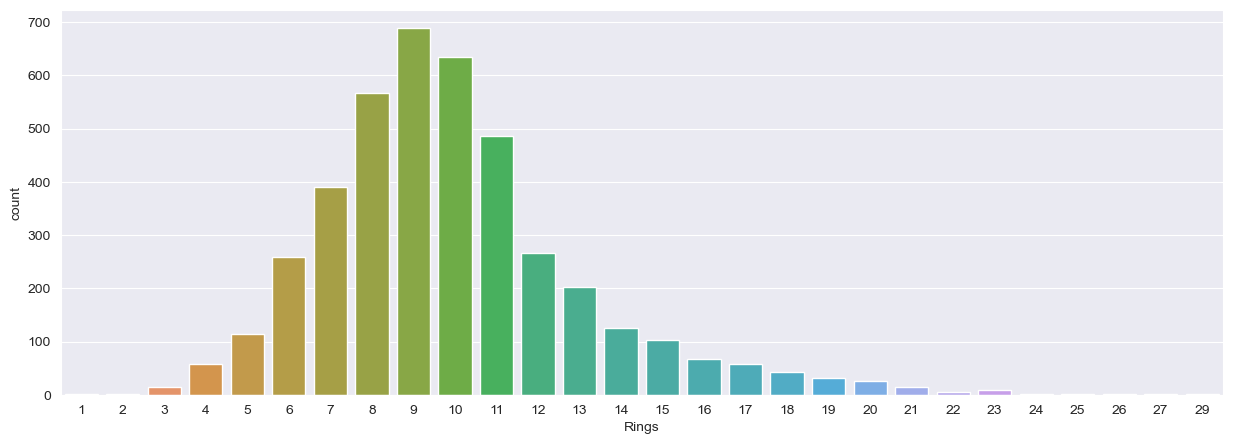

In [13]:
sns.countplot(x=abalone_df["Rings"])

<AxesSubplot:xlabel='Rings', ylabel='count'>

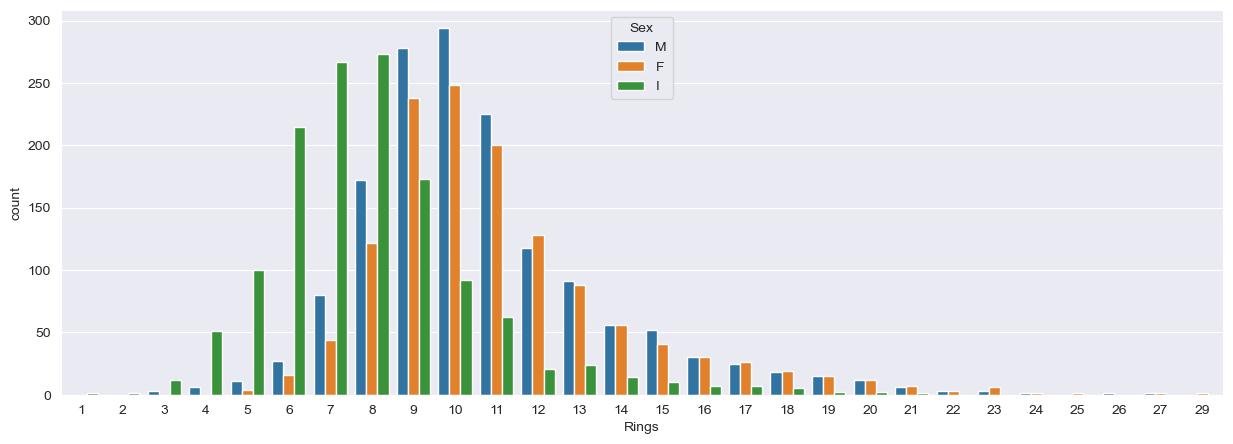

In [14]:
sns.countplot(x=abalone_df["Rings"], hue=abalone_df["Sex"])

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

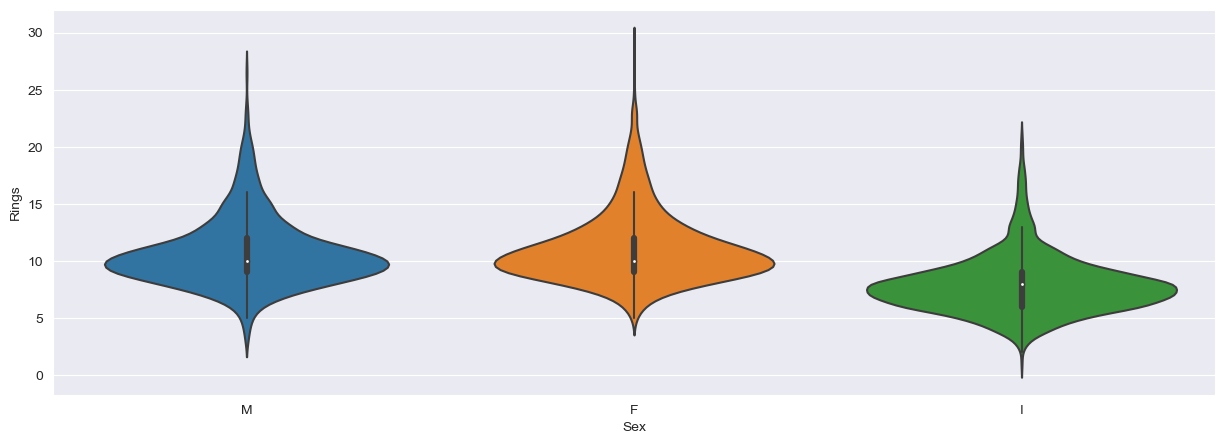

In [15]:
sns.violinplot(x='Sex', y='Rings', data=abalone_df)

# Data Processing - Handling Outliers

Text(0.5, 1.0, 'Box plot')

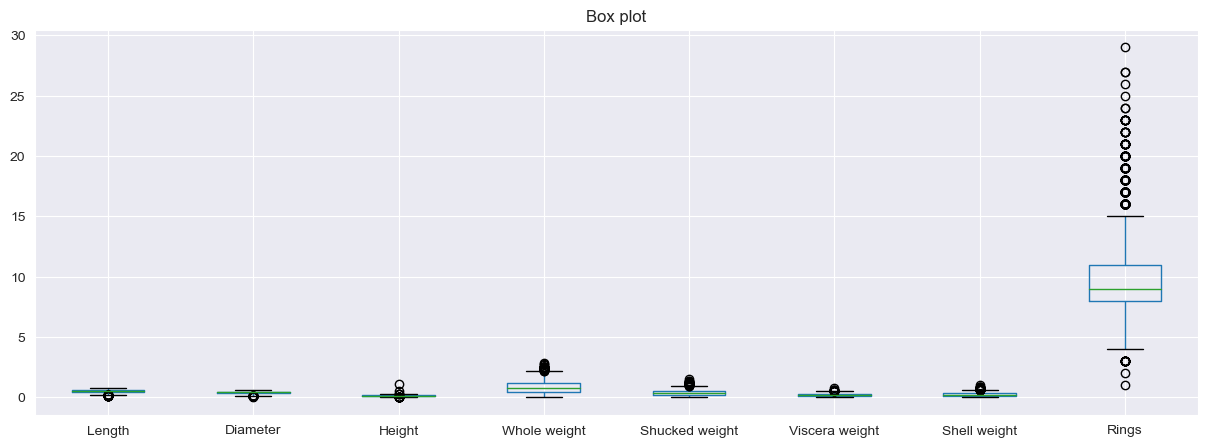

In [16]:
abalone_df.boxplot()
plt.title("Box plot")

Text(0.5, 1.0, 'Viscera weight vs Rings')

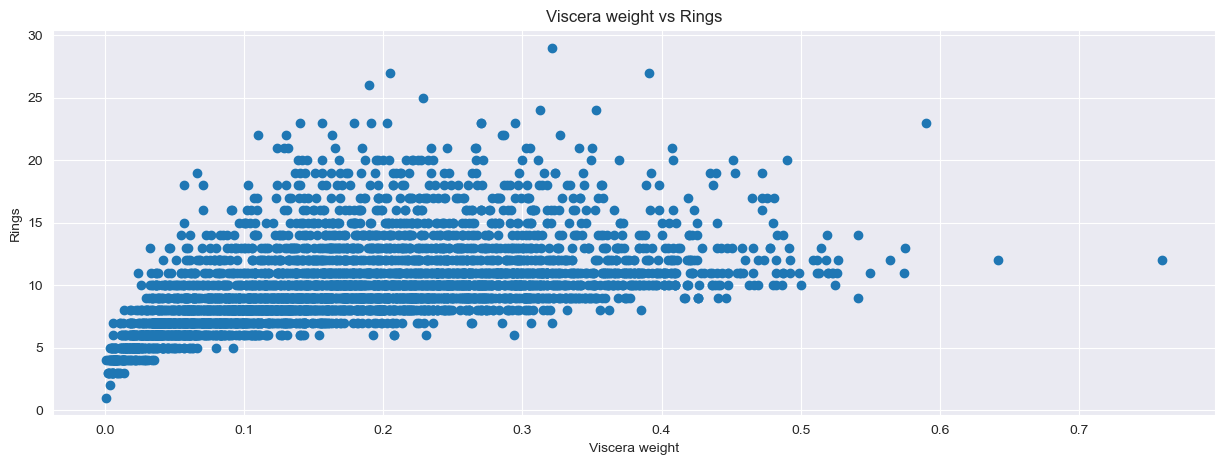

In [17]:
plt.scatter(x = abalone_df["Viscera weight"], y = abalone_df['Rings'],)
plt.grid(True)
plt.xlabel("Viscera weight")
plt.ylabel("Rings")
plt.title("Viscera weight vs Rings")

In [18]:
# Outliers removal
# abalone_df.drop(abalone_df[(abalone_df['Viscera weight']> 0.5) & (abalone_df['Rings'] < 20)].index, inplace=True)
# abalone_df.drop(abalone_df[(abalone_df['Viscera weight']< 0.5) & (abalone_df['Rings'] > 25)].index, inplace=True)

Text(0.5, 1.0, 'Shell weight vs Rings')

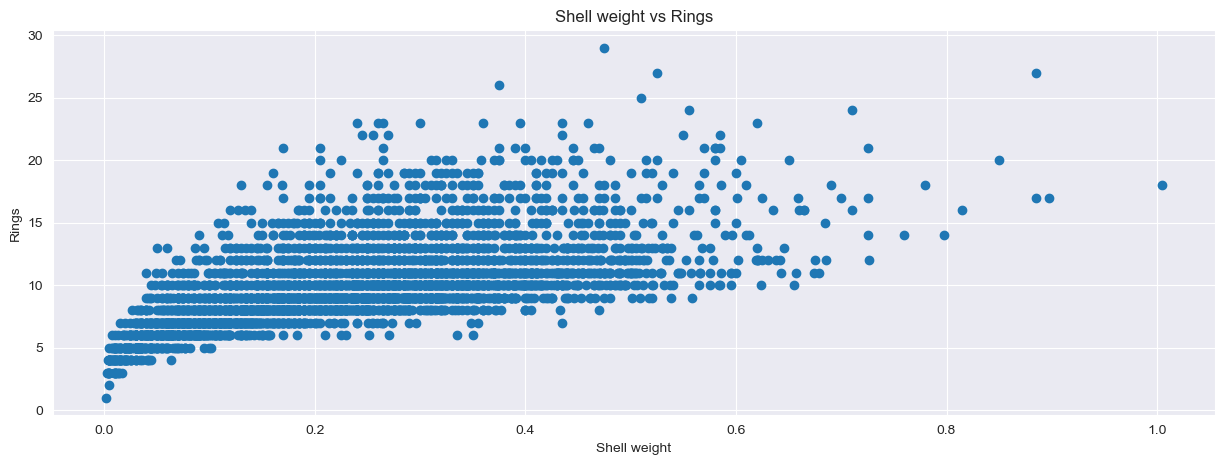

In [19]:
plt.scatter(x = abalone_df['Shell weight'], y = abalone_df['Rings'],)
plt.grid(True)
plt.xlabel("Shell weight")
plt.ylabel("Rings")
plt.title("Shell weight vs Rings")

In [20]:
abalone_df.drop(abalone_df[(abalone_df['Shell weight']> 0.6) & (abalone_df['Rings'] < 25)].index, inplace=True)
abalone_df.drop(abalone_df[(abalone_df['Shell weight']< 0.8) & (abalone_df['Rings'] > 25)].index, inplace=True)

Text(0.5, 1.0, 'Shucked weight vs Rings')

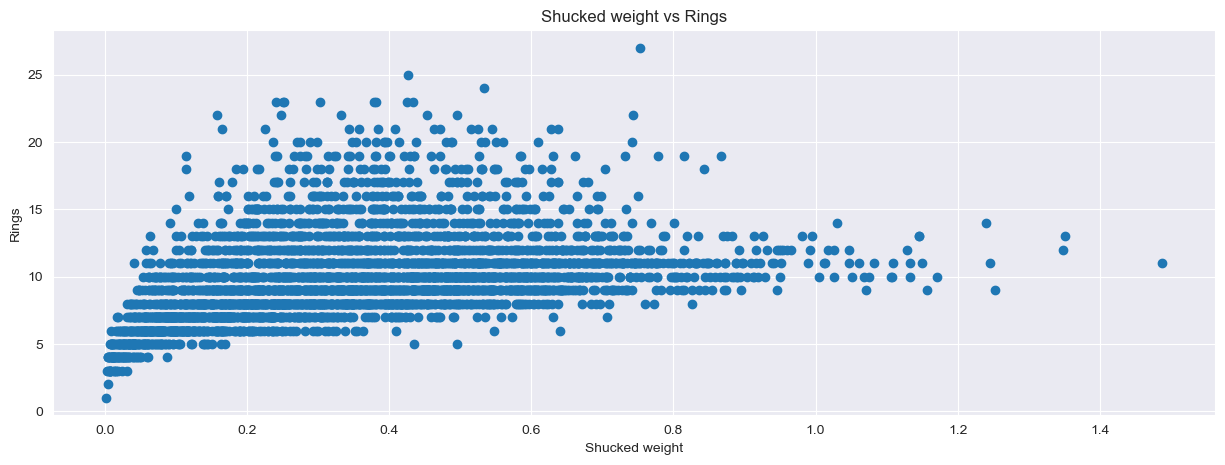

In [21]:
plt.scatter(x = abalone_df['Shucked weight'], y = abalone_df['Rings'],)
plt.grid(True)
plt.xlabel("Shucked weight")
plt.ylabel("Rings")
plt.title("Shucked weight vs Rings")

In [22]:
# abalone_df.drop(abalone_df[(abalone_df['Shucked weight'] >= 1 ) & (abalone_df['Rings'] < 20)].index, inplace=True)
# abalone_df.drop(abalone_df[(abalone_df['Shucked weight'] < 1) & (abalone_df['Rings'] > 20)].index, inplace=True)

Text(0.5, 1.0, 'Whole weight vs Rings')

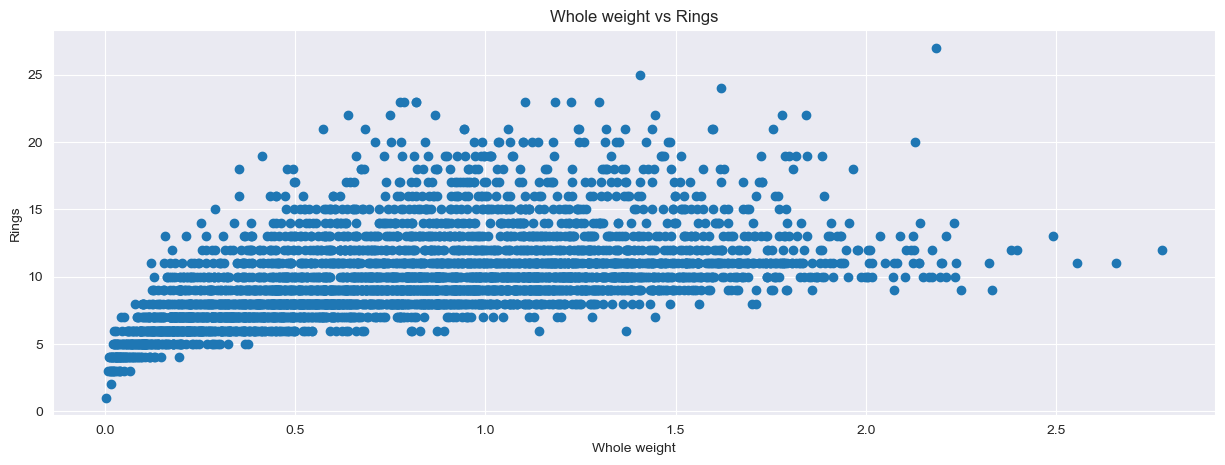

In [23]:
plt.scatter(x = abalone_df["Whole weight"], y = abalone_df['Rings'],)
plt.grid(True)
plt.xlabel("Whole weight")
plt.ylabel("Rings")
plt.title("Whole weight vs Rings")

In [24]:
# Outliers removal
# abalone_df.drop(abalone_df[(abalone_df['Whole weight'] >= 2.5 ) & (abalone_df['Rings'] < 25)].index, inplace=True)
# abalone_df.drop(abalone_df[(abalone_df['Whole weight'] < 2.5) & (abalone_df['Rings'] > 25)].index, inplace=True)

Text(0.5, 1.0, 'Diameter vs Rings')

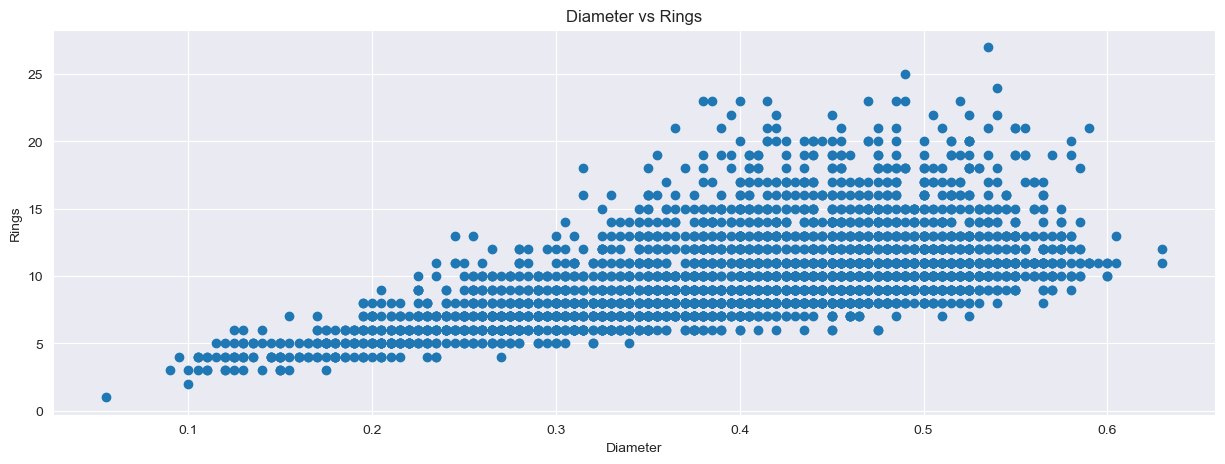

In [25]:
plt.scatter(x = abalone_df["Diameter"], y = abalone_df["Rings"],)
plt.grid(True)
plt.xlabel("Diameter")
plt.ylabel("Rings")
plt.title("Diameter vs Rings")

In [26]:
abalone_df.drop(abalone_df[(abalone_df['Diameter']<0.1) & (abalone_df['Rings'] < 5)].index, inplace=True)
abalone_df.drop(abalone_df[(abalone_df['Diameter']<0.6) & (abalone_df['Rings'] > 25)].index, inplace=True)
abalone_df.drop(abalone_df[(abalone_df['Diameter']>=0.6) & (abalone_df['Rings']< 25)].index, inplace=True)

Text(0.5, 1.0, 'Height vs Rings')

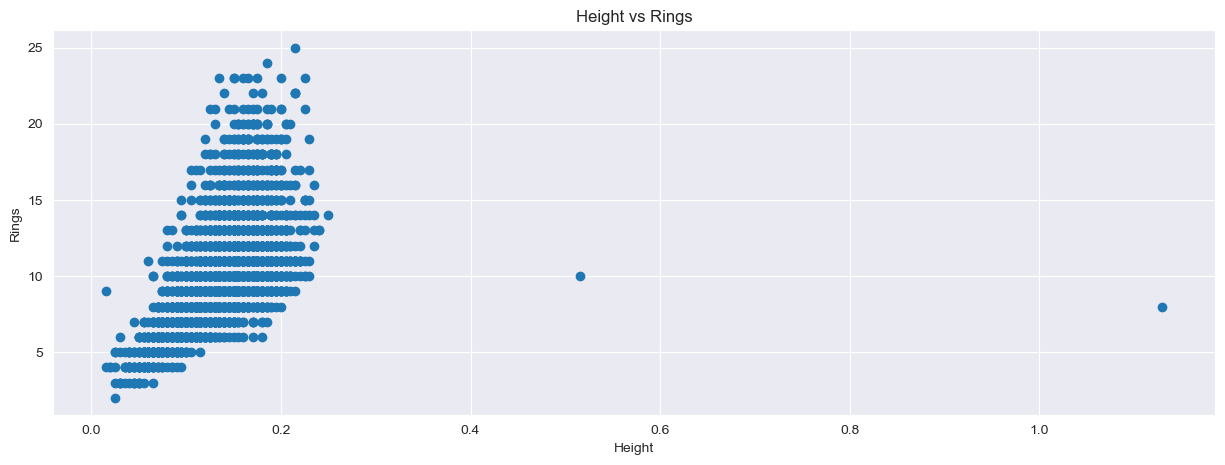

In [27]:
plt.scatter(x = abalone_df["Height"], y = abalone_df['Rings'],)
plt.grid(True)
plt.xlabel("Height")
plt.ylabel("Rings")
plt.title("Height vs Rings")

In [28]:
# abalone_df.drop(abalone_df[(abalone_df['Height']>0.4) & (abalone_df['Rings'] < 15)].index, inplace=True)
# abalone_df.drop(abalone_df[(abalone_df['Height']<0.4) & (abalone_df['Rings'] > 25)].index, inplace=True)

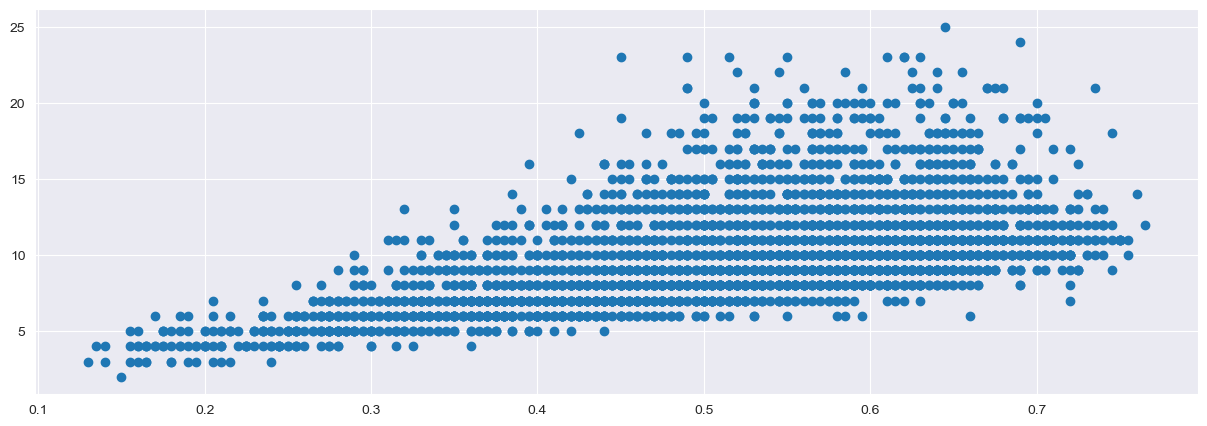

In [29]:
plt.scatter(x = abalone_df["Length"], y = abalone_df['Rings'],)
plt.grid(True)

In [30]:
#Final dataset after removing outliers
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4111 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4111 non-null   object 
 1   Length          4111 non-null   float64
 2   Diameter        4111 non-null   float64
 3   Height          4111 non-null   float64
 4   Whole weight    4111 non-null   float64
 5   Shucked weight  4111 non-null   float64
 6   Viscera weight  4111 non-null   float64
 7   Shell weight    4111 non-null   float64
 8   Rings           4111 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 321.2+ KB


- Eventhough Random Forest is not sensitive to outliers trimming outliers could be conductive to the success of the project. "Shell weight" and "Diameter" are the most correlated with "Rings" so I decided to only trim their outliers since it yeilds highest accuracy score (for Random Forest) if I do so. 

# Data Preprocessing - Data Preparation

In [31]:
abalone_df = pd.get_dummies(abalone_df)

In [32]:
X = abalone_df.drop('Rings', axis = 1)
Y = abalone_df['Rings']

In [33]:
from sklearn.feature_selection import SelectKBest

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selectkBest = SelectKBest()
X_KBest = selectkBest.fit_transform(X, Y)

X_KBest = pd.DataFrame(data=X_scaled, columns=X.columns)

X_train, X_test, Y_train, Y_test = train_test_split(X_KBest, Y, test_size = 0.2, random_state=42)

# Model Creation - Random Forest

In [34]:
rfc = RandomForestClassifier(n_estimators=1000, criterion="gini", min_samples_leaf=5, max_leaf_nodes=5)
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_leaf_nodes=5, min_samples_leaf=5, n_estimators=1000)

In [35]:
rfc_pred = rfc.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, rfc_pred)))

Model accuracy score: 0.2637


In [36]:
rfc_pred = rfc.predict(X_train)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_train, rfc_pred)))

Model accuracy score: 0.2865


# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [40]:
# predict the test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [43]:
y_pred_train_gini = clf_gini.predict(X_train)
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, Y_test)))

Training set score: 0.2765
Test set score: 0.2321


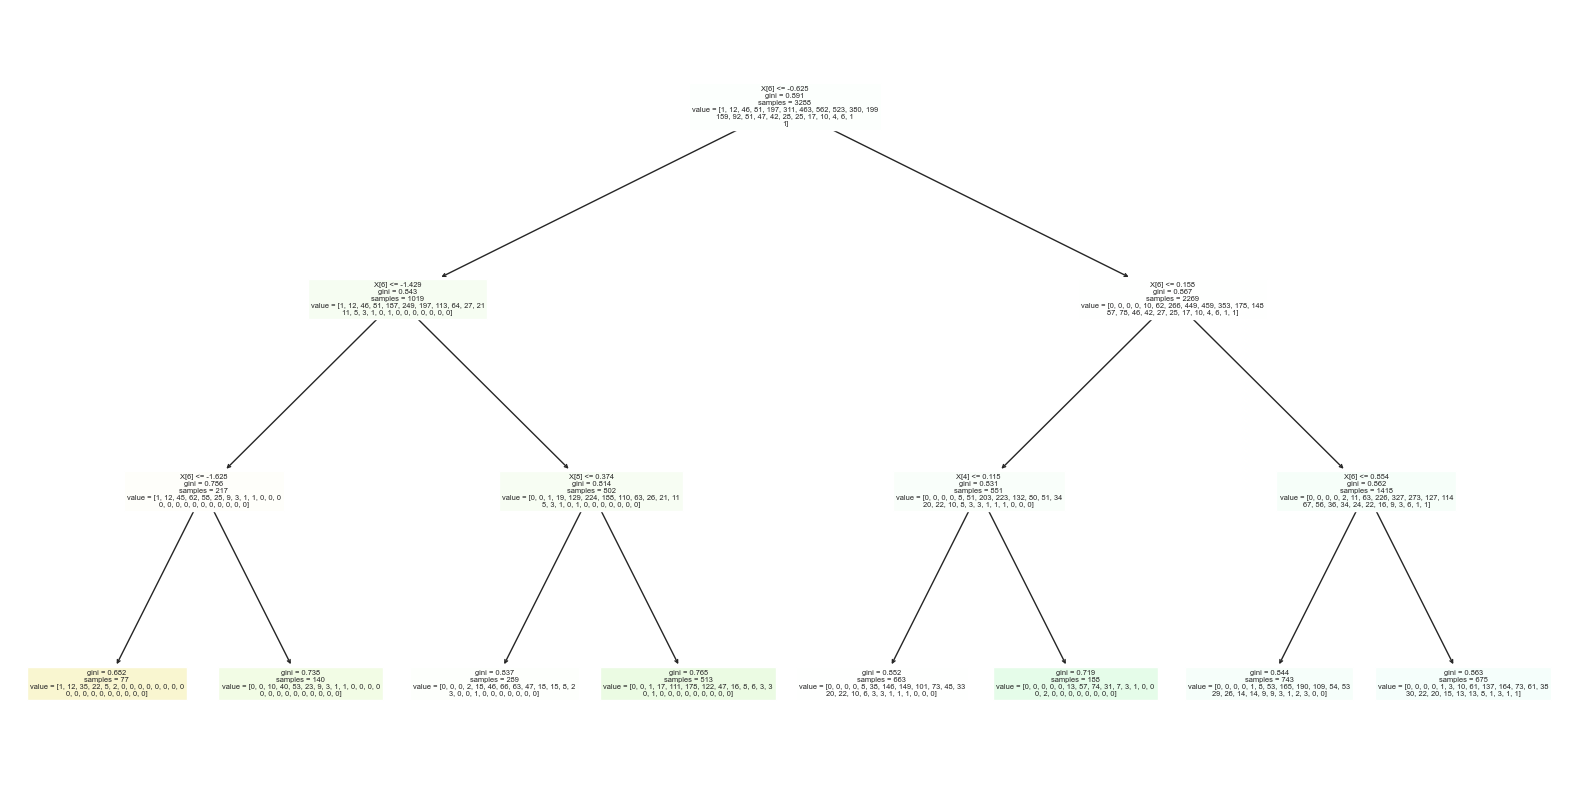

In [47]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(clf_gini, filled=True) 
plt.show()